#Desafio 01 - Módulo Fundamentos

###Importando as bibliotecas necessárias

In [0]:
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

##Carregando os dados no Dataset

Os dados serão carregados a partir do método make_blobs e exibidos pelo método scatter do matplotlib

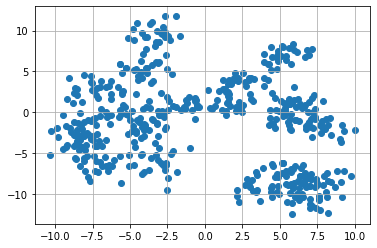

In [2]:
x, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(x[:,0], x[:,1])
plt.grid()

Achando a coordenada do centróide executando o K-Means com apenas 1 cluster

In [3]:
kmeans = KMeans(n_clusters=1).fit(x,y)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.02618523 -1.30384304]]


Achando a soma dos quadrados intra-clusters (wcss) com 5 clusters

In [4]:
wcss = []

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(x)
wcss.append(kmeans.inertia_)

print(wcss)


[4717.404091931214]


Achando a soma dos quadrados intra-clusters (wcss) com 1 cluster

In [5]:
wcss = []

kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(x)
wcss.append(kmeans.inertia_)

print(wcss)


[31547.372471390485]


### Aplicando o Elbow Method para achar o melhor valor do múmero de cluster a ser aplicado no K-Means

In [0]:
def calculate_wcss():
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit_predict(x,y)
    wcss.append(kmeans.inertia_)

  return wcss

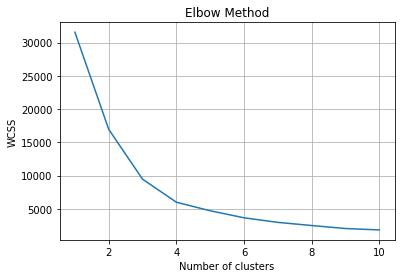

In [7]:
plt.plot(range(1, 11), calculate_wcss())
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

In [0]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
n = optimal_number_of_clusters(calculate_wcss())
print(n)

5


Após aplicado o método Elbow Method, foi identificado que o melhor número de cluster a ser aplicado a esse conjusto de dados são 4 clusters

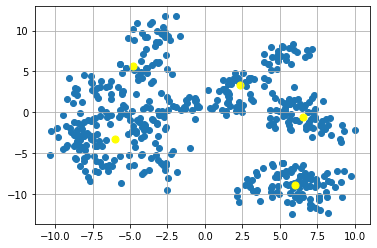

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

pr = kmeans.fit_predict(x, y)
plt.scatter(x[:,0], x[:,1,])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='yellow')
plt.grid()
plt.show()